#### ANOVA and Tukey’s Honest Significant Differences (HSD) test 

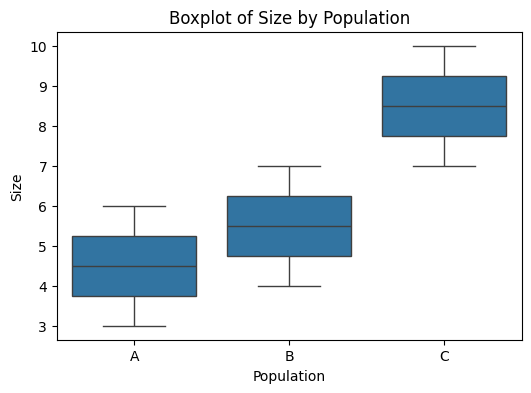

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame
data = pd.DataFrame({
    'size': [3, 4, 5, 6, 4, 5, 6, 7, 7, 8, 9, 10],
    'pop': ["A", "A", "A", "A", "B", "B", "B", "B", "C", "C", "C", "C"]
})

# Create a boxplot using seaborn
plt.figure(figsize=(6, 4))
sns.boxplot(x='pop', y='size', data=data)

# Set labels and title
plt.xlabel("Population")
plt.ylabel("Size")
plt.title("Boxplot of Size by Population")

# Show plot
plt.show()


One-Way ANOVA Results:
              sum_sq   df     F    PR(>F)
pop       34.666667  2.0  10.4  0.004572
Residual  15.000000  9.0   NaN       NaN

Tukey's HSD Test Results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B      1.0 0.5402 -1.5487 3.5487  False
     A      C      4.0 0.0045  1.4513 6.5487   True
     B      C      3.0 0.0232  0.4513 5.5487   True
---------------------------------------------------


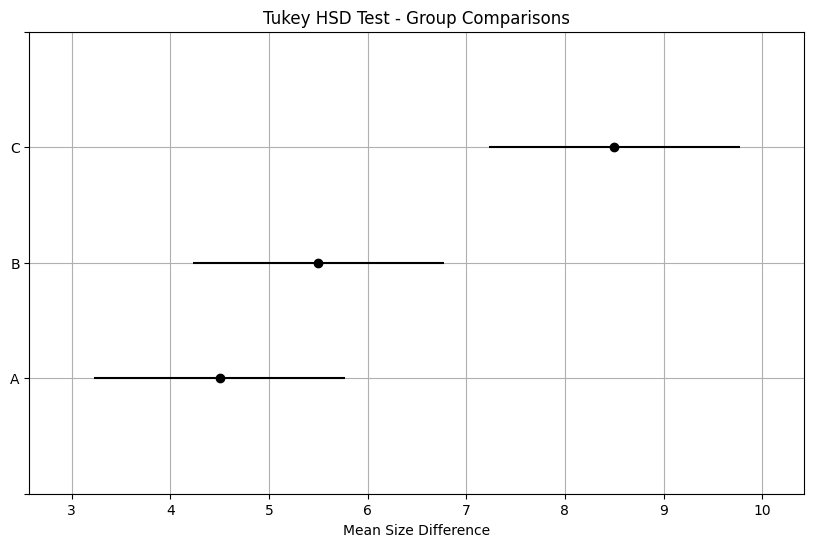

In [4]:
# Perform ANOVA and Tukey's HSD test
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd


model = ols('size ~ pop', data=data).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
print("One-Way ANOVA Results:\n", anova_results)

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(data['size'], data['pop'])
print("\nTukey's HSD Test Results:\n", tukey_results)

# Plot Tukey’s HSD results
fig = tukey_results.plot_simultaneous()
plt.title("Tukey HSD Test - Group Comparisons")
plt.xlabel("Mean Size Difference")
plt.grid(True)
plt.show()


In [6]:
## Checking Assumptions of Equal Variances
## Perform Levene's test for equal variances
# Extract values for each group
from scipy import stats

group_A = data[data['pop'] == "A"]['size']
group_B = data[data['pop'] == "B"]['size']
group_C = data[data['pop'] == "C"]['size']

# Perform Levene's test
levene_stat, levene_p = stats.levene(group_A, group_B, group_C)

# Print results
print(f"Levene’s Test Statistic: {levene_stat:.4f}")
print(f"p-value: {levene_p:.4f}")

# Interpretation
if levene_p > 0.05:
    print("Result: Variances are equal (assumption holds).")
else:
    print("Result: Variances are unequal (assumption violated).")

Levene’s Test Statistic: 0.0000
p-value: 1.0000
Result: Variances are equal (assumption holds).


#### Interpretation: variances are equal (assumption holds)

In [8]:
## Checking Assumptions of Normality
## Normality Test (Every group should be normally distributed)

# Perform Shapiro-Wilk test for normality
# Assumption 1: Normality (Shapiro-Wilk test for each group)
shapiro_stat_A, shapiro_p_A = stats.shapiro(group_A)
shapiro_stat_B, shapiro_p_B = stats.shapiro(group_B)
shapiro_stat_C, shapiro_p_C = stats.shapiro(group_C)
# "shapiro_stat_A": is called W-statistics. It measures how closely the dataset follows a normal distribution (range 0 to 1).
# "shapiro_p_A": is the p-value. It indicates the significance of the W-statistics.


# Print results
print("Shapiro-Wilk Normality Test Results:")
print(f"Group A: W={shapiro_stat_A:.4f}, p-value={shapiro_p_A:.4f}")
print(f"Group B: W={shapiro_stat_B:.4f}, p-value={shapiro_p_B:.4f}")
print(f"Group C: W={shapiro_stat_C:.4f}, p-value={shapiro_p_C:.4f}")

# Interpretation
def interpret_shapiro(p_value, group_name):
    if p_value > 0.05:
        print(f"Group {group_name} is **normally distributed** (p = {p_value:.4f})")
    else:
        print(f"Group {group_name} **violates normality** (p = {p_value:.4f})")

interpret_shapiro(shapiro_p_A, "A")
interpret_shapiro(shapiro_p_B, "B")
interpret_shapiro(shapiro_p_C, "C")

Shapiro-Wilk Normality Test Results:
Group A: W=0.9929, p-value=0.9719
Group B: W=0.9929, p-value=0.9719
Group C: W=0.9929, p-value=0.9719
Group A is **normally distributed** (p = 0.9719)
Group B is **normally distributed** (p = 0.9719)
Group C is **normally distributed** (p = 0.9719)


#### Interpretation: All groups are normally distributed (p > 0.05), so the assumption of normality holds.

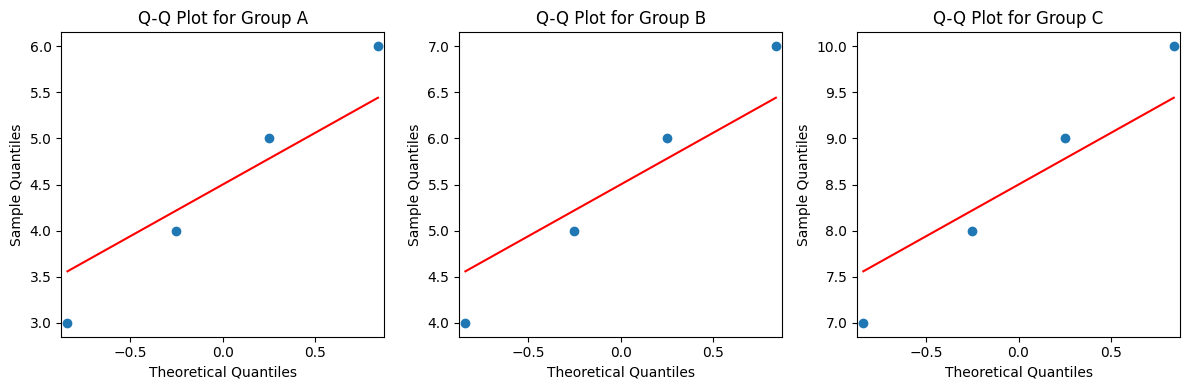

In [9]:
## Checking Assumptions of Normality
## create Q-Q plots for each group
import matplotlib.pyplot as plt

# Create Q-Q Plots for each group without using a loop
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Q-Q Plot for Group A
sm.qqplot(group_A, line='s', ax=axes[0])
axes[0].set_title('Q-Q Plot for Group A')

# Q-Q Plot for Group B
sm.qqplot(group_B, line='s', ax=axes[1])
axes[1].set_title('Q-Q Plot for Group B')

# Q-Q Plot for Group C
sm.qqplot(group_C, line='s', ax=axes[2])
axes[2].set_title('Q-Q Plot for Group C')

plt.tight_layout()
plt.show()

#### Intepretation: The Q-Q plots show that the data in each group is approximately normally distributed (assumption holds).